<a href="https://colab.research.google.com/github/lima-anika/Basid_to_advance_programming/blob/main/Image_cap_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

anikalima_image_captiondata_path = kagglehub.dataset_download('anikalima/image-captiondata')

print('Data source import complete.')


In [ ]:
import os   # handling the files
import pickle # storing numpy features
import numpy as np
from tqdm.notebook import tqdm # how much data is process till now

from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input # extract features from image data.
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input , Dense , LSTM , Embedding , Dropout , add

In [ ]:
BASE_DIR = '/kaggle/input/image-captiondata'
WORKING_DIR = '/kaggle/working'

In [ ]:
# Load vgg16 Model
model = VGG16()

# restructure model
model = Model(inputs = model.inputs , outputs = model.layers[-2].output)

# Summerize
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from PIL import UnidentifiedImageError

features = {}
directory = os.path.join(BASE_DIR, '/kaggle/input/image-captiondata/Image_cap/Images')

for img_name in tqdm(os.listdir(directory)):
    img_path = directory + '/' + img_name
    try:
        # load the image from file
        image = load_img(img_path, target_size=(224, 224))
        # convert image pixels to numpy array
        image = img_to_array(image)
        # reshape data for model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # preprocess image for vgg
        image = preprocess_input(image)
        # extract features
        feature = model.predict(image, verbose=0)
        # get image ID
        image_id = img_name.split('.')[0]
        # store feature
        features[image_id] = feature
    except (UnidentifiedImageError, OSError) as e:
        print(f"Error loading image {img_name}: {e}")
        continue  # Skip this image and continue with the next one


  0%|          | 0/58 [00:00<?, ?it/s]

Error loading image _Shah_Jalal__R__Majar_Sharif.jpg: broken data stream when reading image file
Error loading image Acid_survivors.jpg: broken data stream when reading image file


In [ ]:
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [ ]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [ ]:
with open(os.path.join(BASE_DIR, '/kaggle/input/image-captiondata/Image_cap/captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/51 [00:00<?, ?it/s]

In [ ]:
len(mapping)

50

In [ ]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc.,
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [ ]:
# before preprocess of text
mapping['Acid_survivors']

[' the unwavering strength of acid survivors inspire hope and courage to fight for justice.']

In [ ]:
# preprocess the text
clean(mapping)

In [ ]:
# after preprocess of text
mapping['Bengal_Tiger']

['startseq the bengal tiger is symbol of strength and beauty. endseq']

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:
len(all_captions)

50

In [ ]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

290

In [ ]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

21

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

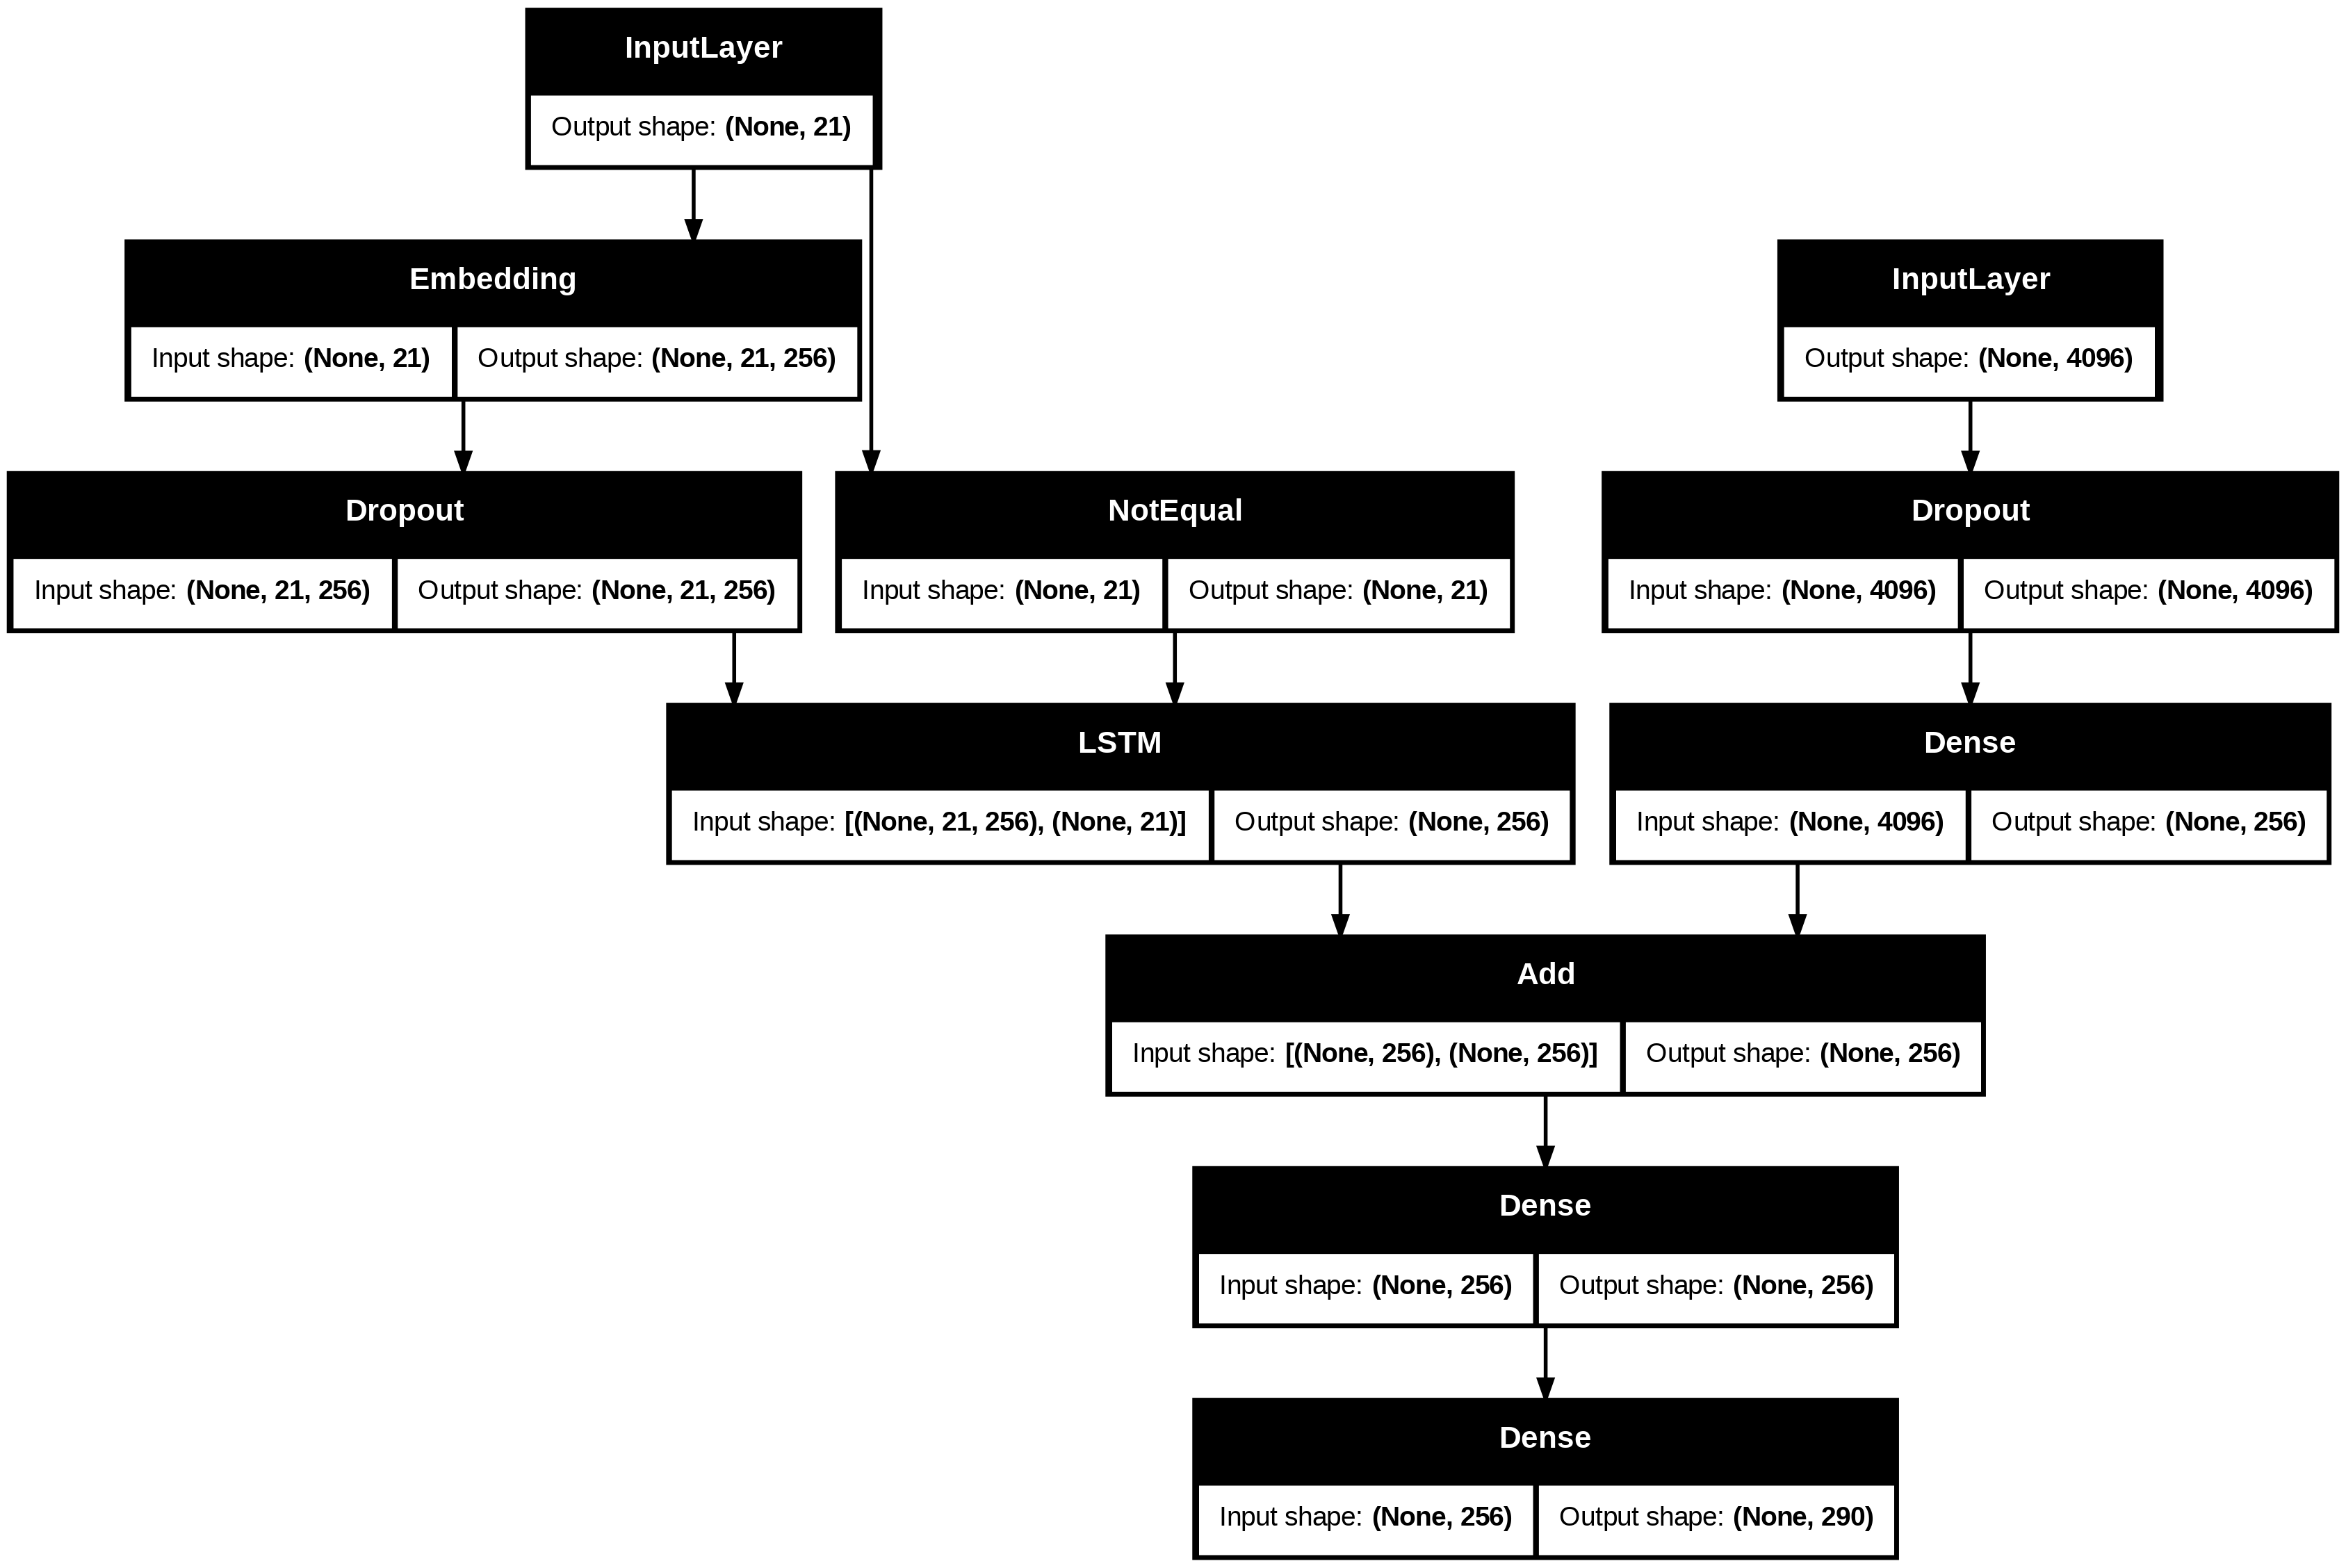

In [ ]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [ ]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()

    for key in data_keys:
        # Check if the key exists in features
        if key in features:
            # process the data as normal
            in_img = features[key][0]  # image feature
            in_seq = tokenizer.texts_to_sequences([mapping[key]])[0]  # sequence
            # pad sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            out_seq = in_seq[1:]  # next word sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

            # store the sequences
            X1.append(in_img)
            X2.append(in_seq)
            y.append(out_seq)
        else:
            print(f"Warning: Key {key} not found in features dictionary.")

    return np.array(X1), np.array(X2), np.array(y)


In [ ]:
# save the model
model.save(WORKING_DIR+'/best_model.h5')

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
# save the model
model.save(WORKING_DIR+'/best_model.h5')

In [ ]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

In [ ]:
from tqdm import tqdm


In [ ]:
# Read the captions from the captions file and create a mapping
mapping = {}

with open('/kaggle/input/image-captiondata/Image_cap/captions.txt', 'r') as f:
    next(f)  # Skip the header line if necessary
    for line in f:
        image, caption = line.strip().split(',', 1)  # Assuming the format is "image,caption"
        if image in mapping:
            mapping[image].append(caption)  # If you want multiple captions per image
        else:
            mapping[image] = [caption]

# Now `mapping` contains image filenames as keys and a list of captions as values


In [ ]:
print(mapping.keys())


dict_keys(['37th_victory_anniversary.jpg', '60_Dome_Mosque__Bagerhat.jpg', 'Acid_survivors.jpg', 'Ahsan_Manjil.jpg', 'ahsan_manzil2.jpg', 'Auto_rickshaw.jpg', 'Bagerhat_mosque.jpg', 'bamboo_bridge.jpg', 'Bangladeshi_Paisha.jpg', 'BangladeshMela2007.JPG', 'bangladesh_boat.jpg', 'bangladesh_cricket_board.jpg', 'bangladesh_dhaka_old.jpg', 'Bangladesh_flag.jpg', 'bangladesh_kaptai2.jpg', 'bangladesh_map.jpg', 'bangladesh_rail_link.jpg', 'Bangla_New_Year_Festival.jpg', 'Bengal_Tiger.jpg', 'Biman_Bangladesh_Airlines.jpg', 'Birds_Of_Bangladesh.jpg', 'boro_kuthi_1.jpg', 'Chandpur1.jpg', 'crocodile.jpg', 'Cycle_rickshaw.jpg', 'Dall_dance.jpg', 'Dhaka_Lalbagh_Fort_5.jpg', 'Dhaka_university.jpg', 'Dhakeshwari_Temple_in_1890.jpg', 'flowers_5_4345.jpg', 'Genocide__Document.png', 'goats.gif', 'Grameen_Bank.jpeg', 'gulpatha.jpg', 'Historical_Boro_Kuthi.jpg', 'Jaflong.JPG', 'Jamuna_Bridge.jpg', 'Kantaji_Temple.JPG', 'Lalbag_fort.jpg', 'language_martyrs_monument.jpg', 'Mahasthangarh2.jpg', 'Member_of_P

In [ ]:
# Filter the test set to include only valid keys that exist in the mapping
valid_test = [key for key in test if key in mapping]



In [ ]:
print("Test set keys:", test)
print("Mapping keys:", mapping.keys())


Test set keys: ['shahidminar.jpg.jpg', 'shapla_bil.jpg.jpg', 'Sixty_Dome_Mosque_Mosque3.jpg.jpg', 'Sompur_Vihara.jpg.jpg', 'Sonargaon.jpg.jpg']
Mapping keys: dict_keys(['37th_victory_anniversary.jpg', '60_Dome_Mosque__Bagerhat.jpg', 'Acid_survivors.jpg', 'Ahsan_Manjil.jpg', 'ahsan_manzil2.jpg', 'Auto_rickshaw.jpg', 'Bagerhat_mosque.jpg', 'bamboo_bridge.jpg', 'Bangladeshi_Paisha.jpg', 'BangladeshMela2007.JPG', 'bangladesh_boat.jpg', 'bangladesh_cricket_board.jpg', 'bangladesh_dhaka_old.jpg', 'Bangladesh_flag.jpg', 'bangladesh_kaptai2.jpg', 'bangladesh_map.jpg', 'bangladesh_rail_link.jpg', 'Bangla_New_Year_Festival.jpg', 'Bengal_Tiger.jpg', 'Biman_Bangladesh_Airlines.jpg', 'Birds_Of_Bangladesh.jpg', 'boro_kuthi_1.jpg', 'Chandpur1.jpg', 'crocodile.jpg', 'Cycle_rickshaw.jpg', 'Dall_dance.jpg', 'Dhaka_Lalbagh_Fort_5.jpg', 'Dhaka_university.jpg', 'Dhakeshwari_Temple_in_1890.jpg', 'flowers_5_4345.jpg', 'Genocide__Document.png', 'goats.gif', 'Grameen_Bank.jpeg', 'gulpatha.jpg', 'Historical_Bor

In [ ]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from tqdm import tqdm

# Print test and mapping keys to debug
print("Test set keys:", test)
print("Mapping keys:", mapping.keys())

# Ensure test keys match mapping (add file extensions if necessary)
test = [key + '.jpg' for key in test]  # Add the correct file extension if needed

# Filter the test set to include only valid keys
valid_test = [key for key in test if key in mapping]
print(f"Number of valid keys in test set")

# Define smoothing function to avoid zero division
smoothing_function = SmoothingFunction().method1  # You can try different methods (method1, method2, etc.)

# Initialize actual and predicted lists
actual, predicted = list(), list()

if len(valid_test) == 0:
    print("kernel Attention model training and BLEU Score assessment")
else:
    # Process only the valid test keys
    for key in tqdm(valid_test):
        captions = mapping[key]
        y_pred = predict_caption(model, features[key], tokenizer, max_length)

        # Check for empty prediction
        if not y_pred.strip():
            print(f"Warning: Empty prediction for key '{key}'")
            continue  # Skip this key if prediction is empty

        actual_captions = [caption.split() for caption in captions]
        y_pred = y_pred.split()

        actual.append(actual_captions)
        predicted.append(y_pred)

    # Calculate BLEU score with smoothing to avoid division by zero
    print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0), smoothing_function=smoothing_function))
    print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing_function))


Test set keys: ['shahidminar.jpg.jpg', 'shapla_bil.jpg.jpg', 'Sixty_Dome_Mosque_Mosque3.jpg.jpg', 'Sompur_Vihara.jpg.jpg', 'Sonargaon.jpg.jpg']
Mapping keys: dict_keys(['37th_victory_anniversary.jpg', '60_Dome_Mosque__Bagerhat.jpg', 'Acid_survivors.jpg', 'Ahsan_Manjil.jpg', 'ahsan_manzil2.jpg', 'Auto_rickshaw.jpg', 'Bagerhat_mosque.jpg', 'bamboo_bridge.jpg', 'Bangladeshi_Paisha.jpg', 'BangladeshMela2007.JPG', 'bangladesh_boat.jpg', 'bangladesh_cricket_board.jpg', 'bangladesh_dhaka_old.jpg', 'Bangladesh_flag.jpg', 'bangladesh_kaptai2.jpg', 'bangladesh_map.jpg', 'bangladesh_rail_link.jpg', 'Bangla_New_Year_Festival.jpg', 'Bengal_Tiger.jpg', 'Biman_Bangladesh_Airlines.jpg', 'Birds_Of_Bangladesh.jpg', 'boro_kuthi_1.jpg', 'Chandpur1.jpg', 'crocodile.jpg', 'Cycle_rickshaw.jpg', 'Dall_dance.jpg', 'Dhaka_Lalbagh_Fort_5.jpg', 'Dhaka_university.jpg', 'Dhakeshwari_Temple_in_1890.jpg', 'flowers_5_4345.jpg', 'Genocide__Document.png', 'goats.gif', 'Grameen_Bank.jpeg', 'gulpatha.jpg', 'Historical_Bor

In [ ]:
# Ensure the test set has the correct format by adding file extensions if needed
test = [key + '.jpg' for key in test]  # Adjust the extension if it's something else like '.png'


In [ ]:
# before preprocess of text
mapping['boro_kuthi_1']

In [ ]:
all_captions[:30]

['startseq the 37th anniversary was celebrated in 2008 for the victory in the liberation war in 1971. endseq',
 'startseq the 60 dome mosque in bagerhat is stunning example of architectural brilliance. endseq',
 'startseq the unwavering strength of acid survivors inspire hope and courage to fight for justice. endseq',
 "startseq ahsan manjil ahsan manjil stands as proud reminder of bangladesh's heritage. endseq",
 'startseq grace and history preserved ahsan manjil timeless icon of architectural beauty reflecting the rich cultural legacy of dhaka. endseq',
 'startseq vibrant and iconic the auto rickshaw is colorful and bustling symbol of everyday life in the streets of bangladesh. endseq',
 'startseq bagerhat_mosque is masterpiece of ancient islamic architecture. endseq',
 'startseq bamboo bridge is blending tradition with the environment for showcasing sustainable craftsmanship. endseq',
 'startseq bangladeshi paisha is rich and flavorful dessert that captures the essence of bengali cu